In [1]:
from mupsipy import * 

SCHRÖDINGER 1D : Paquet gaussien


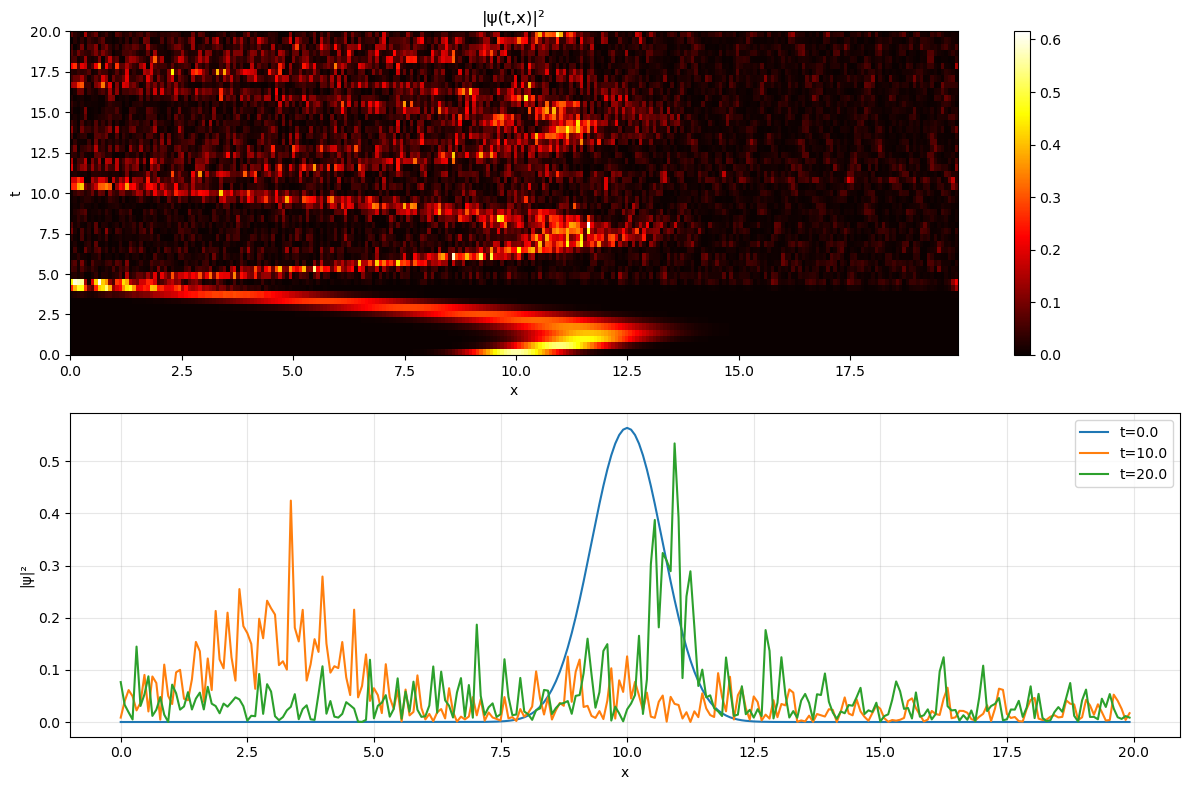

✓ Terminé


In [2]:
"""Paquet d'onde en mécanique quantique"""
print("="*60)
print("SCHRÖDINGER 1D : Paquet gaussien")
print("="*60)

# Grille
grid = Grid.create_1d(N=256, L=20.0, periodic=True)
evolver = Evolver(grid, 'periodic')

# Hamiltonien : H = p²/(2m) + V(x)
m = 1.0

def T_func(t):
    """Symbole cinétique T = ξ²/(2m)"""
    return Symbol.from_function(
        grid, lambda t, x, xi: xi**2 / (2*m), order=2, t=t
    )

def V_func(t):
    """Potentiel harmonique V = ½mω²x²"""
    omega = 0.5
    return Symbol.from_function(
        grid, lambda t, x, xi: 0.5 * m * omega**2 * x**2, order=0, t=t
    )

# État initial : paquet gaussien
x = grid.x
x0, sigma, k0 = 10.0, 1.0, 3.0
psi0 = np.exp(-(x - x0)**2 / (2*sigma**2)) * np.exp(1j * k0 * x)
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * grid.dx)

# Évolution
times, psi_hist = evolver.evolve_splitting(
    psi0, T_func, V_func,
    t_span=(0, 20),
    Nt=500,
    imaginary=True,  # Schrödinger
    save_every=10
)

# Visualisation
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
extent = [grid.x[0], grid.x[-1], times[0], times[-1]]
plt.imshow(np.abs(psi_hist)**2, aspect='auto', origin='lower',
          extent=extent, cmap='hot')
plt.xlabel('x')
plt.ylabel('t')
plt.title('|ψ(t,x)|²')
plt.colorbar()

plt.subplot(2, 1, 2)
for i in [0, len(times)//2, -1]:
    plt.plot(grid.x, np.abs(psi_hist[i])**2, label=f't={times[i]:.1f}')
plt.xlabel('x')
plt.ylabel('|ψ|²')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('schrodinger_1d.png', dpi=150)
plt.show()

print("✓ Terminé")

CHALEUR 1D : Diffusion


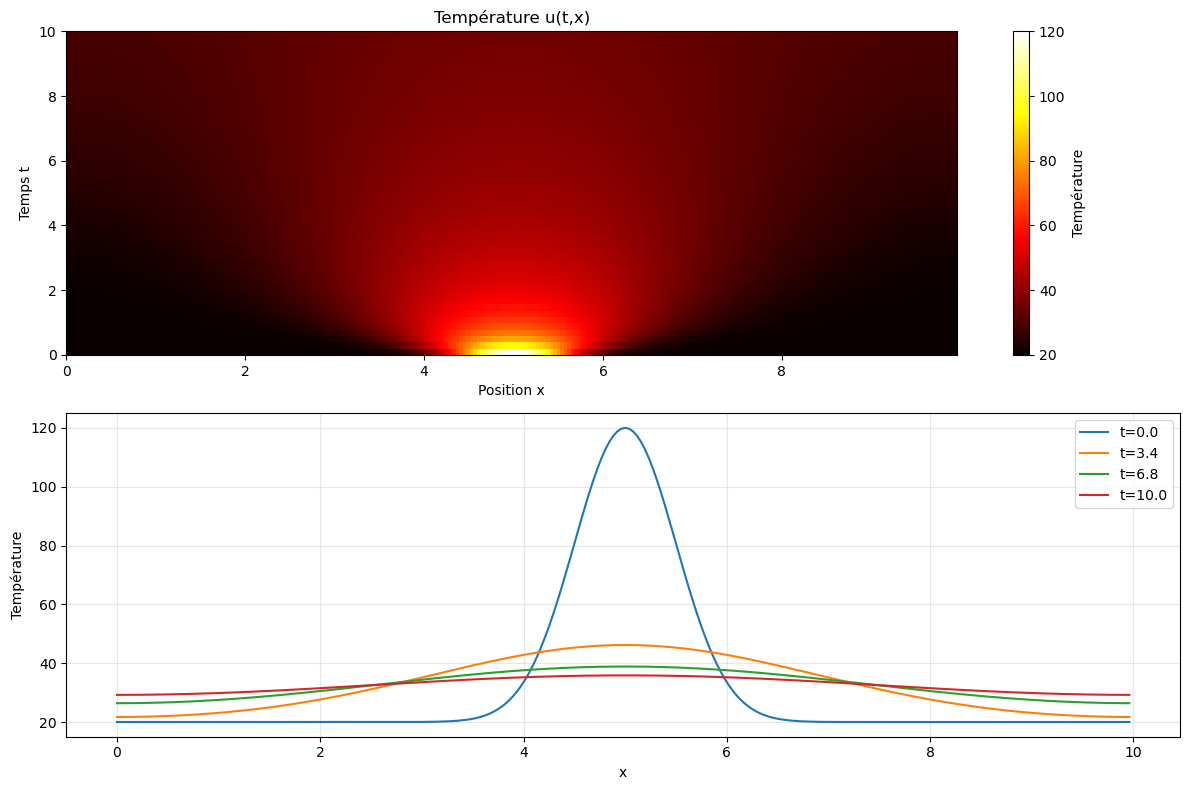

✓ Terminé


In [3]:
"""Diffusion thermique"""
print("="*60)
print("CHALEUR 1D : Diffusion")
print("="*60)

grid = Grid.create_1d(N=256, L=10.0, periodic=True)
evolver = Evolver(grid, 'periodic')

# Hamiltonien : H = -D ξ² (diffusion)
D = 0.5

def T_func(t):
    """Symbole diffusion : -D ξ²"""
    return Symbol.from_function(
        grid, lambda t, x, xi: -D * xi**2, order=2, t=t
    )

def V_func(t):
    """Pas de potentiel"""
    V = Symbol(grid, order=0)
    V.values[:] = 0.0  # Remplit le tableau avec des zéros
    return V

# État initial : pic gaussien
x = grid.x
u0 = 100.0 * np.exp(-(x - 5.0)**2 / 0.5) + 20.0

# Évolution
times, u_hist = evolver.evolve_splitting(
    u0, T_func, V_func,
    t_span=(0, 10),
    Nt=500,
    imaginary=False,  # Chaleur (pas Schrödinger)
    save_every=10
)

# Prendre partie réelle
u_hist = np.real(u_hist)

# Visualisation
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
extent = [grid.x[0], grid.x[-1], times[0], times[-1]]
plt.imshow(u_hist, aspect='auto', origin='lower',
          extent=extent, cmap='hot', vmin=20, vmax=120)
plt.xlabel('Position x')
plt.ylabel('Temps t')
plt.title('Température u(t,x)')
plt.colorbar(label='Température')

plt.subplot(2, 1, 2)
for i in [0, len(times)//3, 2*len(times)//3, -1]:
    plt.plot(grid.x, u_hist[i], label=f't={times[i]:.1f}')
plt.xlabel('x')
plt.ylabel('Température')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('heat_1d.png', dpi=150)
plt.show()

print("✓ Terminé")

ONDE 1D : Corde vibrante


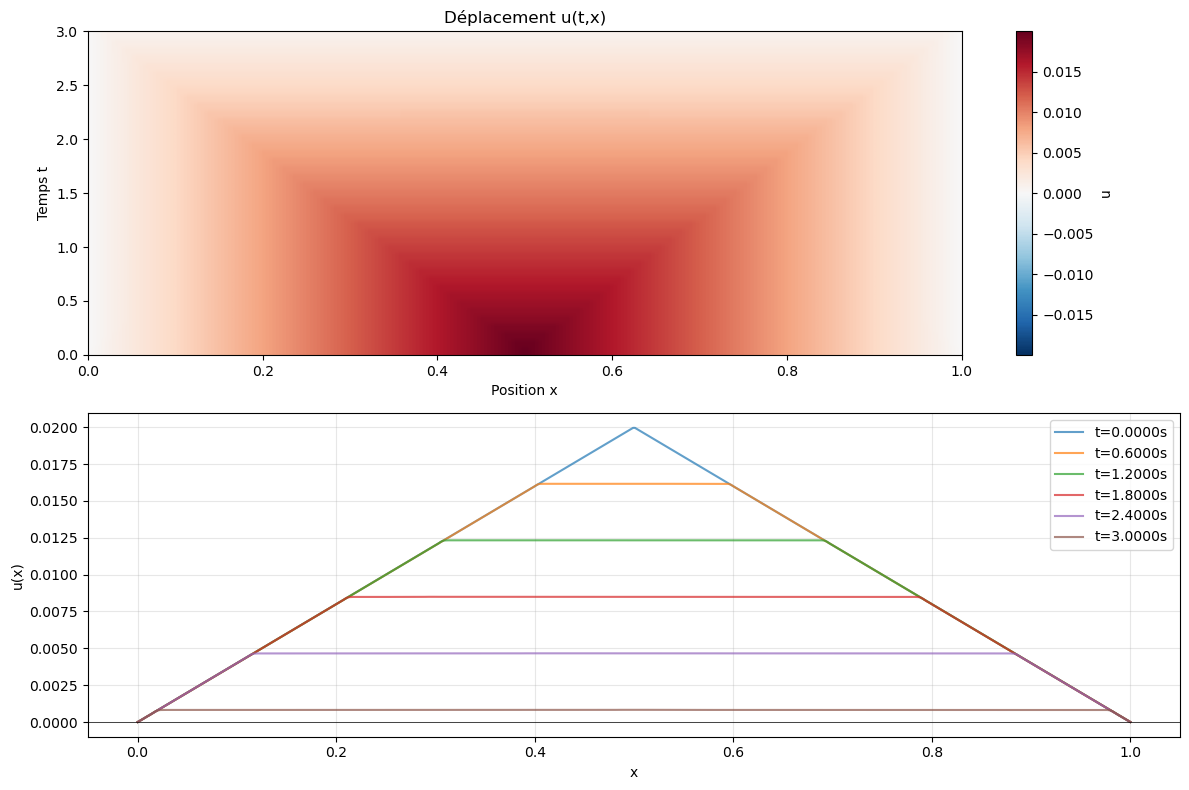

✓ Terminé


In [12]:
"""Corde vibrante"""
print("="*60)
print("ONDE 1D : Corde vibrante")
print("="*60)

grid = Grid.create_1d(N=512, L=1.0, periodic=False)
evolver = Evolver(grid, 'dirichlet')

# Hamiltonien : h = c²ξ²
c = 100.0

def h_func(t):
    """Symbole onde : c²ξ²"""
    return Symbol.from_function(
        grid, lambda t, x, xi: c**2 * xi**2, order=2, t=t
    )

# État initial : corde pincée
x = grid.x
u0 = np.where(x < 0.5, 0.02 * x / 0.5, 0.02 * (1.0 - x) / 0.5)
u0[0] = 0.0
u0[-1] = 0.0
v0 = np.zeros_like(x)

# Évolution
times, u_hist, v_hist = evolver.evolve_wave(
    u0, v0, h_func,
    t_span=(0, 3),
    Nt=1000,
    damping=0.0,
    save_every=25
)

# Visualisation
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
extent = [grid.x[0], grid.x[-1], times[0], times[-1]]
vmax = np.max(np.abs(u_hist[0]))
plt.imshow(u_hist, aspect='auto', origin='lower',
          extent=extent, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
plt.xlabel('Position x')
plt.ylabel('Temps t')
plt.title('Déplacement u(t,x)')
plt.colorbar(label='u')

plt.subplot(2, 1, 2)
indices = np.linspace(0, len(times)-1, 6, dtype=int)
for idx in indices:
    plt.plot(grid.x, u_hist[idx], label=f't={times[idx]:.4f}s', alpha=0.7)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('wave_1d.png', dpi=150)
plt.show()

print("✓ Terminé")

In [5]:
"""Manipulation de symboles"""
print("="*60)
print("OPÉRATIONS SYMBOLIQUES")
print("="*60)

grid = Grid.create_1d(N=128, L=10.0, periodic=True)

# Créer deux symboles
h = Symbol.from_function(grid, lambda t, x, xi: x**2 + xi**2, order=2, t=0.0)
g = Symbol.from_function(grid, lambda t, x, xi: x * xi, order=1, t=0.0)

print("\n1. Produit de Moyal : h #_W g")
hg = moyal_product(h, g, order=2)
print(f"   ||h #_W g||_L2 = {symbol_norm(hg, 'L2'):.4f}")

print("\n2. Crochet de Poisson : {x, p}")
x_sym = Symbol.from_function(grid, lambda t, x, xi: x, order=0, t=0.0)
p_sym = Symbol.from_function(grid, lambda t, x, xi: xi, order=1, t=0.0)
pb = poisson_bracket(x_sym, p_sym)
print(f"   {{x, p}} = {np.mean(pb.values):.6f} (attendu: 1.0)")

print("\n3. Inverse symbolique")
h_elliptic = Symbol.from_function(grid, lambda t, x, xi: 1.0 + xi**2, order=2, t=0.0)
h_inv = symbolic_inverse(h_elliptic, order=2)


# Vérifier h #_W h^{-1} ≈ 1
identity = moyal_product(h_elliptic, h_inv, order=2)
error = np.max(np.abs(identity.values - 1.0))
print(f"   ||h #_W h^{{-1}} - 1||_∞ = {error:.2e}")

print("\n✓ Tests symboliques terminés")



OPÉRATIONS SYMBOLIQUES

1. Produit de Moyal : h #_W g
   ||h #_W g||_L2 = 4210535.3915

2. Crochet de Poisson : {x, p}
   {x, p} = -0.000000 (attendu: 1.0)

3. Inverse symbolique
   ||h #_W h^{-1} - 1||_∞ = 1.00e-12

✓ Tests symboliques terminés


HAMILTONIEN GÉNÉRIQUE UTILISATEUR


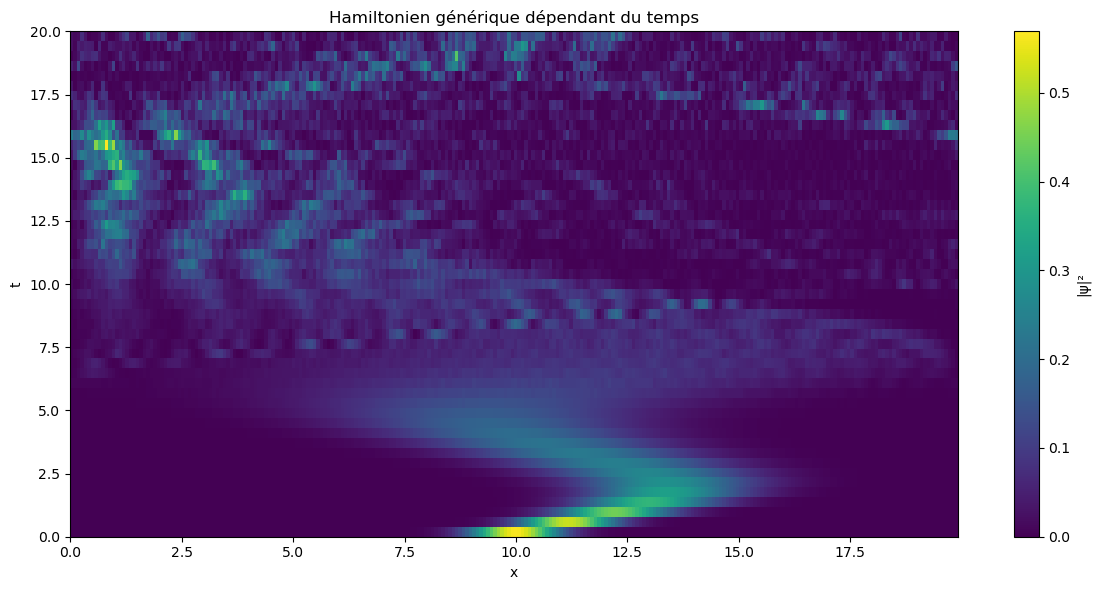

✓ Terminé


In [6]:
# ============================================================================
# EXEMPLE 5 : HAMILTONIEN GÉNÉRIQUE UTILISATEUR
# ============================================================================


"""
Montre comment définir un hamiltonien complètement générique

L'utilisateur fournit simplement une fonction h(t, x, ξ)
"""
print("="*60)
print("HAMILTONIEN GÉNÉRIQUE UTILISATEUR")
print("="*60)

grid = Grid.create_1d(N=256, L=20.0, periodic=True)
evolver = Evolver(grid, 'periodic')

# L'utilisateur définit son hamiltonien
# Exemple : particule dans potentiel dépendant du temps
def my_hamiltonian(t, x, xi):
    """
    H(t,x,ξ) = ξ²/(2m) + V(t,x)
    
    Potentiel oscillant : V(t,x) = A sin(ωt) x²
    """
    m = 1.0
    A = 0.1
    omega = 1.0
    
    kinetic = xi**2 / (2 * m)
    potential = A * np.sin(omega * t) * x**2
    
    return kinetic + potential

# Créer fonction qui retourne le symbole à chaque instant
def h_func(t):
    return Symbol.from_function(grid, my_hamiltonian, order=2, t=t)

# Décomposer automatiquement en T + V
h_test = h_func(0.0)
T, V = decompose_hamiltonian(h_test)

def T_func(t):
    h = h_func(t)
    T, _ = decompose_hamiltonian(h)
    return T

def V_func(t):
    h = h_func(t)
    _, V = decompose_hamiltonian(h)
    return V

# État initial
x = grid.x
psi0 = np.exp(-(x - 10)**2 / 2) * np.exp(1j * 3 * x)
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * grid.dx)
    
# Évolution
times, psi_hist = evolver.evolve_splitting(
    psi0, T_func, V_func,
    t_span=(0, 20),
    Nt=500,
    imaginary=True,
    save_every=10
)

# Visualisation
plt.figure(figsize=(12, 6))
extent = [grid.x[0], grid.x[-1], times[0], times[-1]]
plt.imshow(np.abs(psi_hist)**2, aspect='auto', origin='lower',
          extent=extent, cmap='viridis')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Hamiltonien générique dépendant du temps')
plt.colorbar(label='|ψ|²')
plt.tight_layout()
plt.savefig('custom_hamiltonian.png', dpi=150)
plt.show()

print("✓ Terminé")

SCHRÖDINGER 2D


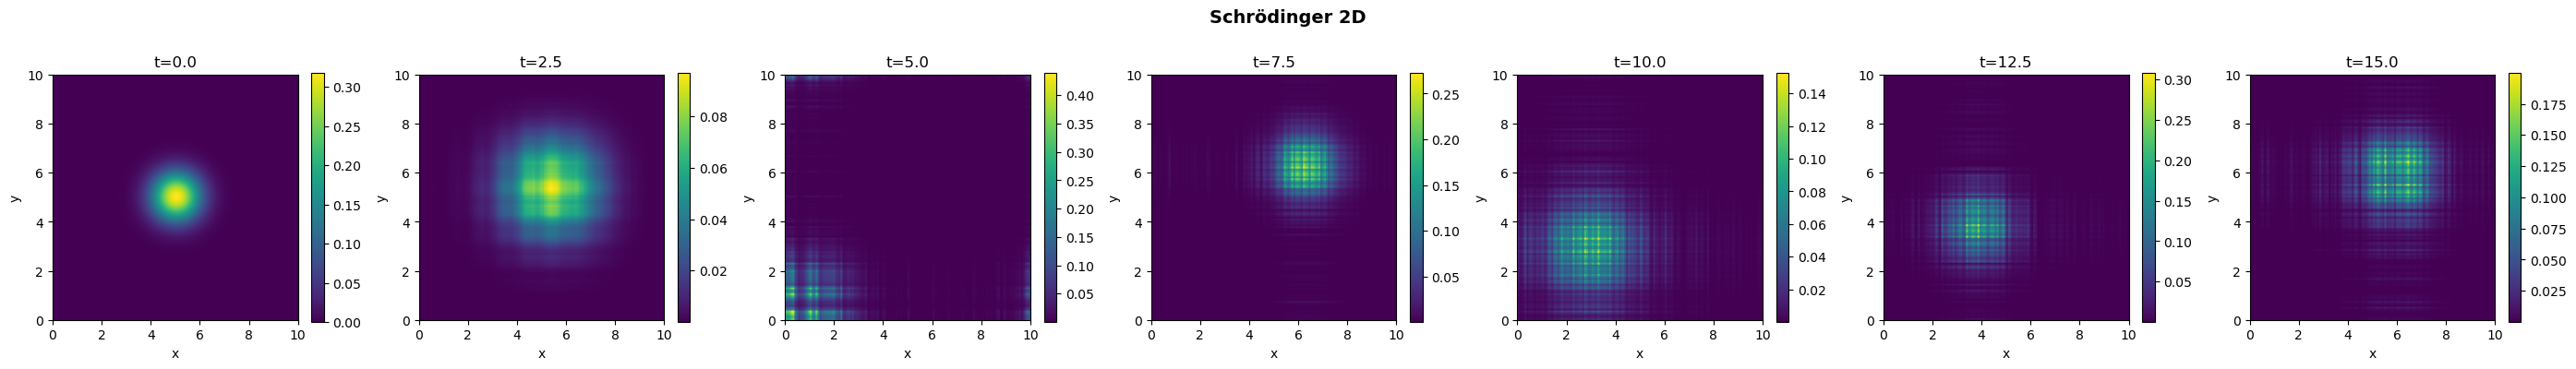

✓ Terminé


In [11]:
"""Exemple 2D : Schrödinger"""
print("="*60)
print("SCHRÖDINGER 2D")
print("="*60)

grid = Grid.create_2d(Nx=128, Ny=128, Lx=10.0, Ly=10.0, periodic=True)
evolver = Evolver(grid, 'periodic')

# Hamiltonien : H = (p_x² + p_y²)/(2m) + V(x,y)
m = 1

def T_func(t):
    """Cinétique 2D"""
    def kinetic(t, x, y, xi_x, xi_y):
        return (xi_x**2 + xi_y**2) / (2 * m)
    return Symbol.from_function(grid, kinetic, order=2, t=t)

def V_func(t):
    """Potentiel harmonique 2D"""
    omega = 0.5
    def potential(t, x, y, xi_x, xi_y):
        return 0.5 * m * omega**2 * (x**2 + y**2)
    return Symbol.from_function(grid, potential, order=0, t=t)

# État initial : paquet gaussien 2D
X, Y = grid.x
x0, y0, sigma = 5.0, 5.0, 1.0
kx0, ky0 = 2.0, 2.0

psi0 = (np.exp(-((X - x0)**2 + (Y - y0)**2) / (2*sigma**2)) *
        np.exp(1j * (kx0 * X + ky0 * Y)))
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * grid.dx**2)

# Évolution
times, psi_hist = evolver.evolve_splitting(
    psi0, T_func, V_func,
    t_span=(0, 15),
    Nt=300,
    imaginary=True,
    save_every=50
)

# Visualisation
fig, axes = plt.subplots(1, len(psi_hist), figsize=(4*len(psi_hist), 4))

for i, (ax, psi) in enumerate(zip(axes, psi_hist)):
    im = ax.imshow(np.abs(psi)**2, extent=[0, 10, 0, 10],
                  origin='lower', cmap='viridis')
    ax.set_title(f't={times[i]:.1f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.suptitle('Schrödinger 2D', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('schrodinger_2d.png', dpi=150)
plt.show()

print("✓ Terminé")